<i><h1 style="text-align:center;color:#FFFFF">Predictive Analytics : Caso II</h1></i>
<i><h3 style="text-align:center;color:#FFFFF">Compra/Venta de Autos nuevos y usados : Precios y Ventas Futuras</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Por : Roberto Muñoz Campos</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Bastián Rojas Gutierrez</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Matías Rojas Escobar</h3></i></i>
<i><h3 style="text-align:center;color:#FFFFF">Christian Vergara Retamal</h3></i></i>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.dpi"] = 75 

In [3]:
df = pd.read_csv("tdelux-Caso-II.csv",delimiter = ";")

In [4]:
df.head()

,Id,Model,Price,Mfg_Year,Sale_Year,Age,Sale_Month,KM,Prec_Venta,Fuel_Type,...,ABS,Airbag_1,Airbag_2,Automatic_airco,Boardcomputer,Seat_Heater,Sport_Model,Backseat_Divider,Leather Seats,Parking_Assistant
0,1,T-Delux 1.6 16V VVT I HATCHB SOL AUT4 2/3-Doors,9620555,2017,2018,1,1,29686,1,Gasolina,...,1,1,1,0,1,1,0,1,1,0
1,2,T-Delux 1.3 16V HATCHB G6 2/3-Doors,9093352,2017,2018,1,1,69659,0,Gasolina,...,1,1,1,0,0,1,1,1,0,0
2,3,T-Delux 1.6 16V VVT I HATCHB G6 2/3-Doors,7826670,2017,2018,1,1,126110,0,Gasolina,...,1,1,1,0,1,1,0,1,1,0
3,4,T-Delux 1.6 16V VVT I WAGON TERRA Stationwagen,8910247,2017,2018,1,1,47689,0,Gasolina,...,1,1,1,0,0,0,0,1,0,0
4,5,T-Delux 1.6 16V VVT I SEDAN TERRA 4/5-Doors,7465337,2017,2018,1,1,115558,0,Gasolina,...,1,1,1,0,0,1,0,1,0,0


In [5]:
df.shape

(1338, 32)

In [6]:
#train.to_excel("train.xlsx", index_label=False)
#test.to_excel("test.xlsx", index_label=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1338 non-null   int64 
 1   Model              1338 non-null   object
 2   Price              1338 non-null   int64 
 3   Mfg_Year           1338 non-null   int64 
 4   Sale_Year          1338 non-null   int64 
 5   Age                1338 non-null   int64 
 6   Sale_Month         1338 non-null   int64 
 7   KM                 1338 non-null   int64 
 8   Prec_Venta         1338 non-null   int64 
 9   Fuel_Type          1338 non-null   object
 10  HP                 1338 non-null   int64 
 11  Met_Color          1338 non-null   int64 
 12  Color              1338 non-null   object
 13  Automatic          1338 non-null   int64 
 14  CC                 1338 non-null   int64 
 15  Doors              1338 non-null   int64 
 16  Cylinders          1338 non-null   int64 


In [8]:
df.describe()

,Id,Price,Mfg_Year,Sale_Year,Age,Sale_Month,KM,Prec_Venta,HP,Met_Color,...,ABS,Airbag_1,Airbag_2,Automatic_airco,Boardcomputer,Seat_Heater,Sport_Model,Backseat_Divider,Leather Seats,Parking_Assistant
count,1338.000000,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,691.683857,7.043141e+06,2016.366218,2019.220478,2.854260,20.185351,72128.698804,0.707025,101.235426,0.665172,...,0.800448,0.968610,0.71151,0.032138,0.253363,0.248132,0.273543,0.770553,0.196562,0.002990
std,412.962337,3.284371e+06,1.233584,0.861353,1.259988,10.297447,36088.881522,0.455297,15.130122,0.472107,...,0.399813,0.174435,0.45323,0.176431,0.435100,0.432090,0.445944,0.420634,0.397547,0.054615
min,1.000000,2.340800e+06,2015.000000,2018.000000,1.000000,1.000000,5309.000000,0.000000,69.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,336.250000,4.803556e+06,2015.000000,2019.000000,2.000000,12.000000,47025.500000,0.000000,86.000000,0.000000,...,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,670.500000,6.103186e+06,2016.000000,2019.000000,3.000000,21.000000,65969.000000,1.000000,110.000000,1.000000,...,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1043.750000,8.354122e+06,2017.000000,2020.000000,4.000000,29.000000,89562.000000,1.000000,110.000000,1.000000,...,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1436.000000,2.488762e+07,2020.000000,2021.000000,6.000000,36.000000,243000.000000,1.000000,192.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.describe(include="object")

,Model,Fuel_Type,Color
count,1338,1338,1338
unique,278,3,10
top,T-Delux 1.6 16V HATCHB LINEA TERRA 2/3-Doors,Gasolina,Red
freq,109,1183,276


In [10]:
df.columns

Index(['Id', 'Model', 'Price', 'Mfg_Year', 'Sale_Year', 'Age', 'Sale_Month',
       'KM', 'Prec_Venta', 'Fuel_Type', 'HP', 'Met_Color', 'Color',
       'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax',
       'Auto_Drive', 'Weight', 'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2',
       'Automatic_airco', 'Boardcomputer', 'Seat_Heater', 'Sport_Model',
       'Backseat_Divider', 'Leather Seats', 'Parking_Assistant'],
      dtype='object')

In [11]:
def grafs(df):
    """
    Genera graficos dependiendo del tipo de dato de la variable

    Parametros:
        dataframe: el dataframe a utilizar

    Retorno:
        grafico de la variable acorde a su tipo de dato

    """
    for index,col in enumerate(df):
        plt.figure(figsize=(12,100))
        plt.subplot((len(list(df.columns)))+1,1, index+1)
        titulo = str(f"Histograma de la variable '{col}'")
        texto_ejex = str(f"Valores de la variable '{col}'")
        
        if df[col].dtypes == "int64":
            sns.distplot(df[col])
            plt.title(titulo, weight='bold')
            plt.xlabel(texto_ejex)
            
        elif df[col].dtypes == "object":
            sns.countplot(df[col])
            plt.title(titulo, weight='bold')
            plt.xlabel(texto_ejex)
        else:
            sns.distplot(df[col], kde = False, bins = 20 ) 
            plt.title(titulo, weight='bold')
            plt.xlabel(texto_ejex)
    plt.tight_layout(h_pad=5)

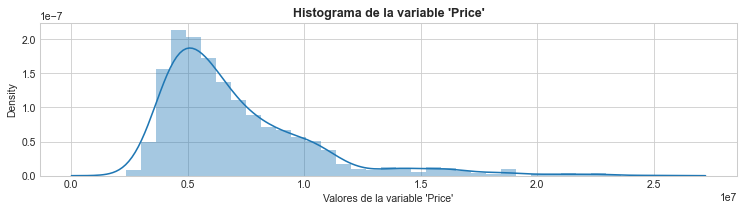

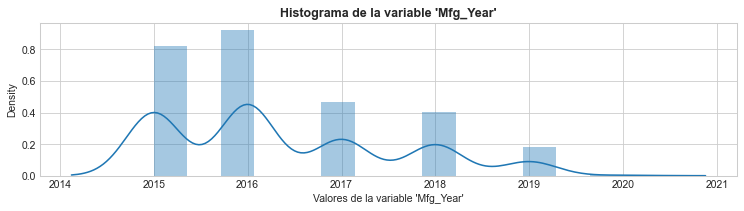

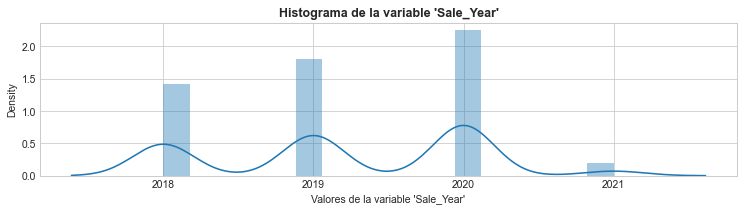

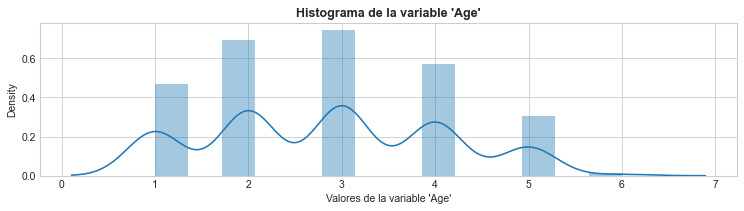

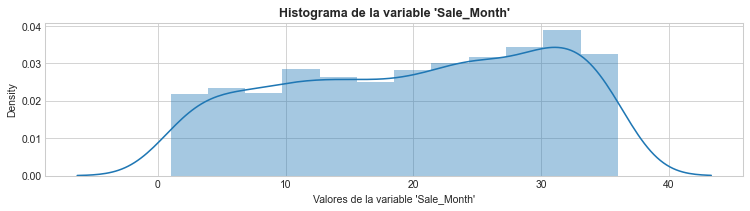

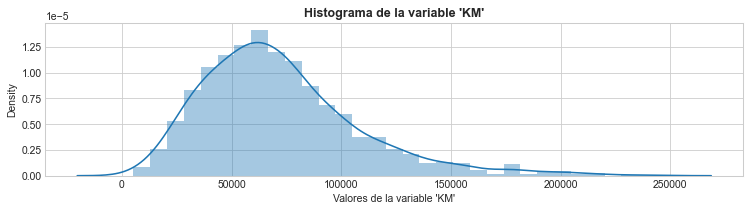

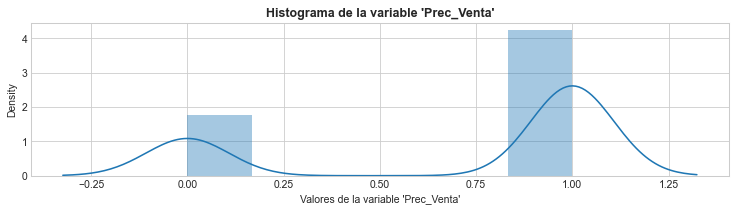

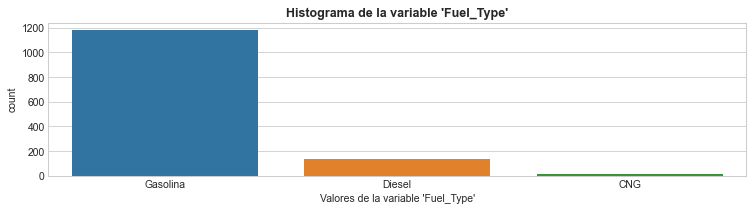

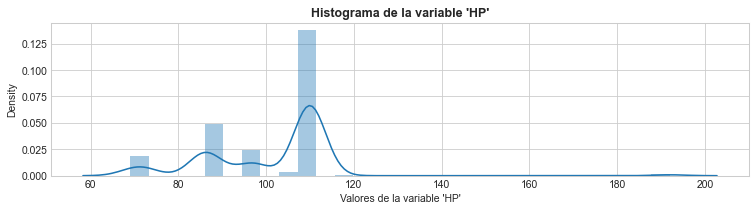

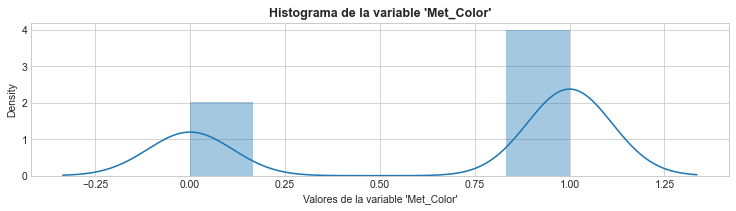

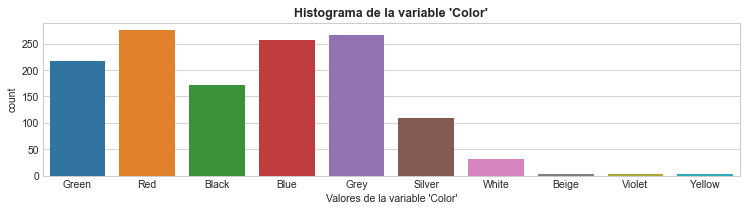

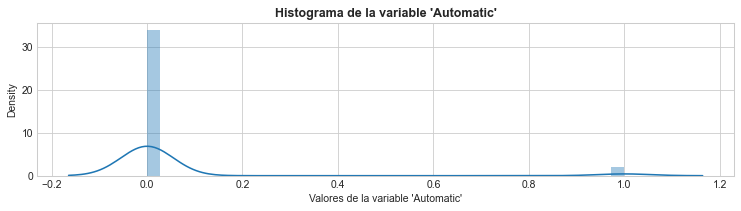

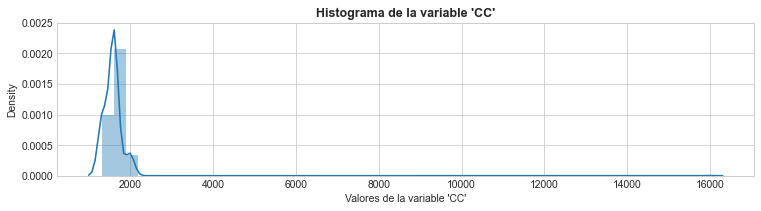

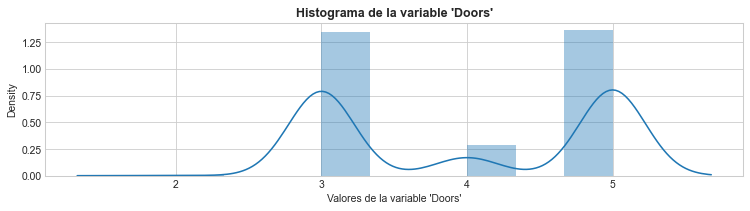

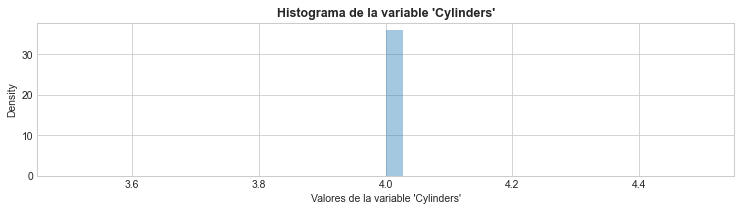

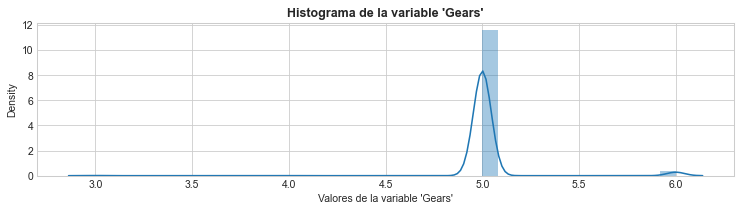

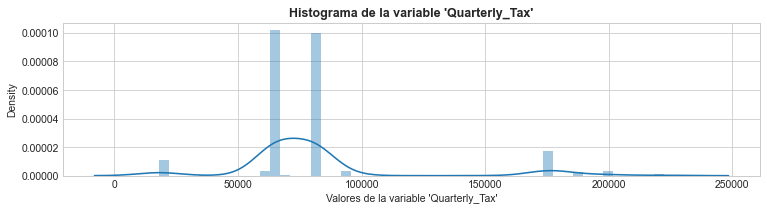

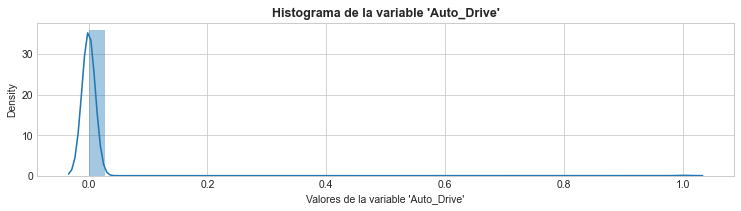

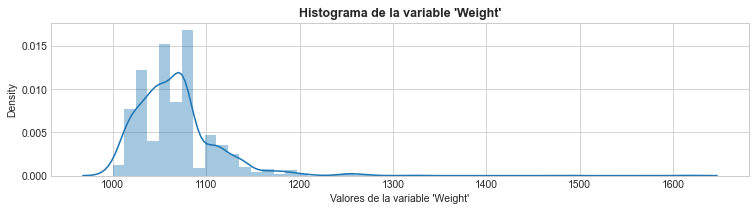

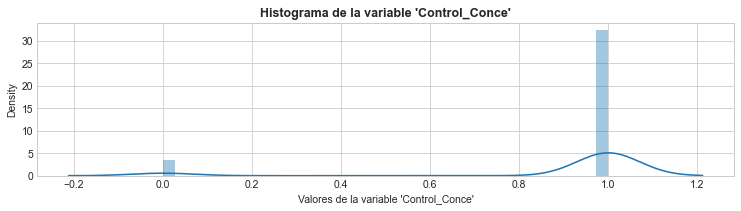

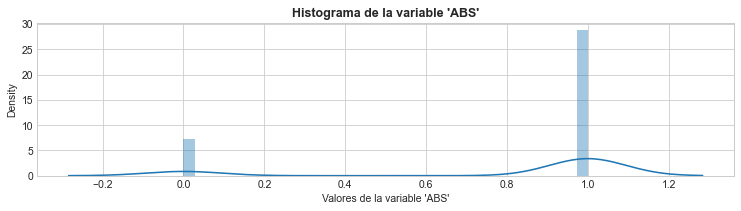

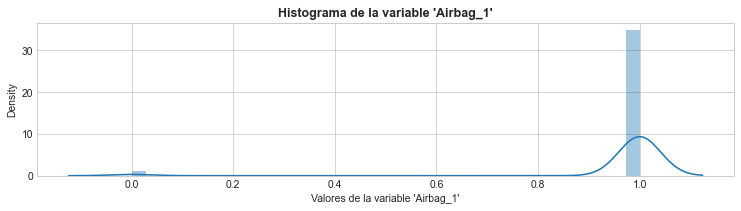

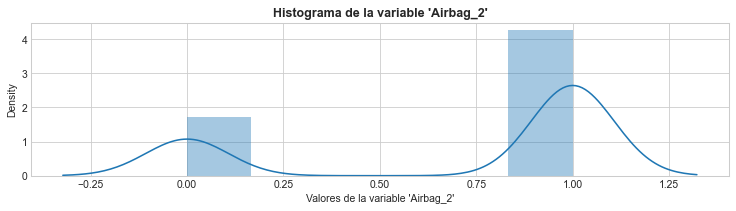

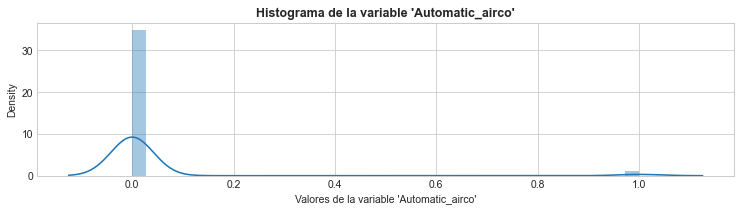

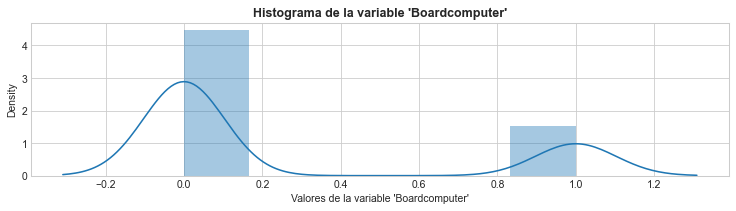

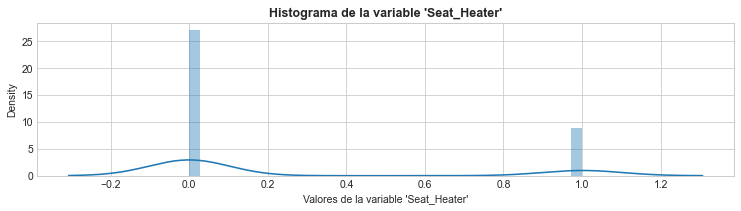

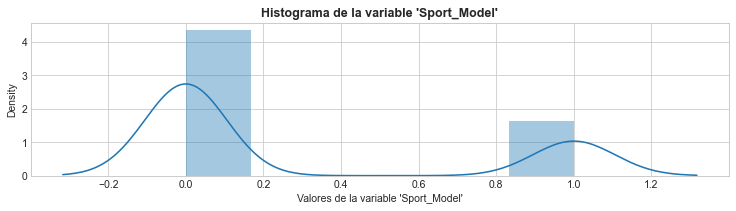

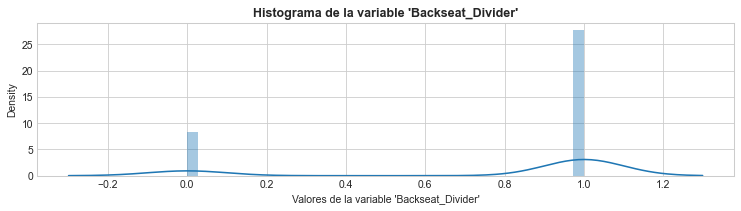

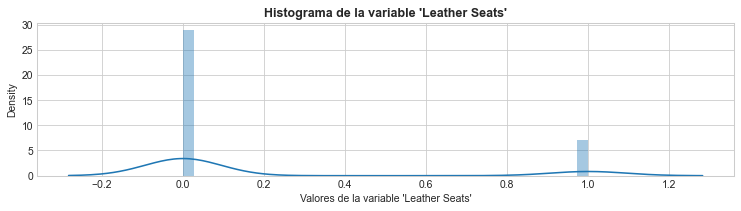

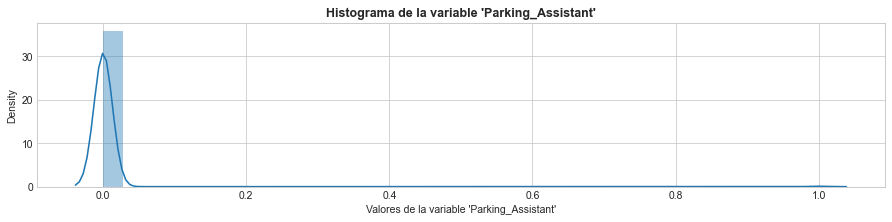

In [12]:
grafs(df.drop(columns=["Id", "Model"]))

In [13]:
def createDummies(df, col):
    """
    La función createDummies tiene por objetivo realizar el proceso de binary encoding
    respecto a una variable específica
    Parámetros : 
        'df' : dataframe que se esta referenciando
        'col' : columna del dataframe en la cual realizaremos el proceso de binary encoding
    """
    dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = df.drop(col, axis = 1) 
    df = pd.concat([df, dummy], axis=1)
    return df


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1338 non-null   int64 
 1   Model              1338 non-null   object
 2   Price              1338 non-null   int64 
 3   Mfg_Year           1338 non-null   int64 
 4   Sale_Year          1338 non-null   int64 
 5   Age                1338 non-null   int64 
 6   Sale_Month         1338 non-null   int64 
 7   KM                 1338 non-null   int64 
 8   Prec_Venta         1338 non-null   int64 
 9   Fuel_Type          1338 non-null   object
 10  HP                 1338 non-null   int64 
 11  Met_Color          1338 non-null   int64 
 12  Color              1338 non-null   object
 13  Automatic          1338 non-null   int64 
 14  CC                 1338 non-null   int64 
 15  Doors              1338 non-null   int64 
 16  Cylinders          1338 non-null   int64 


In [15]:
df = createDummies(df, 'Fuel_Type')
df = createDummies(df, 'Color')

In [16]:
df.columns

Index(['Id', 'Model', 'Price', 'Mfg_Year', 'Sale_Year', 'Age', 'Sale_Month',
       'KM', 'Prec_Venta', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Auto_Drive', 'Weight',
       'Control_Conce', 'ABS', 'Airbag_1', 'Airbag_2', 'Automatic_airco',
       'Boardcomputer', 'Seat_Heater', 'Sport_Model', 'Backseat_Divider',
       'Leather Seats', 'Parking_Assistant', 'Fuel_Type_Diesel',
       'Fuel_Type_Gasolina', 'Color_Black', 'Color_Blue', 'Color_Green',
       'Color_Grey', 'Color_Red', 'Color_Silver', 'Color_Violet',
       'Color_White', 'Color_Yellow'],
      dtype='object')

### Subset de Entrenamiento y prueba

In [17]:
dataframe = pd.DataFrame()
dataframe["Prec_Vent"] = df["Prec_Venta"].copy()
dataframe["KM"] = df["KM"].copy()
dataframe["Age"] = df["Age"].copy()
dataframe["promKM"] = dataframe["KM"] / dataframe["Age"]
dataframe["promKM"] = dataframe["promKM"].apply(np.ceil)
dataframe["promKM"] = dataframe["promKM"].astype("int64") 

In [18]:
dataframe.sample(4)

,Prec_Vent,KM,Age,promKM
1100,1,106150,5,21230
100,1,59326,3,19776
839,1,26000,5,5200
548,1,16512,1,16512


In [19]:
dataframe.Prec_Vent.value_counts()

1    946
0    392
Name: Prec_Vent, dtype: int64

In [20]:
# Variable objetivo
y_vect = dataframe["Prec_Vent"]
# Matriz atributos
X_mat = dataframe.drop(columns=["Prec_Vent", "Age"], axis = 1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_mat, y_vect, test_size = .3, random_state = 1234)

## Modelado

In [22]:
# Estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)
# Estandarizamos la matriz de testeo
X_test_std = StandardScaler().fit_transform(X_test)

In [23]:
model = LogisticRegression().fit(X_train_std, y_train)

In [24]:
y_hat = model.predict(X_test_std)

In [25]:
confusionMatrix_modelo = confusion_matrix(y_test, y_hat)

In [26]:
# Utilizamos crosstab para comparar
confusionMatrix_modelo_ct = pd.crosstab(y_test, y_hat)
confusionMatrix_modelo_ct

col_0,0,1
Prec_Vent,,
0,111,12
1,0,279


* La tabla anterior permite identificar las categorías predichas con las observadas. Mediante la diagonal principal, podemos observar los casos exitosamente predichos

In [27]:
# Aplicamos el método accuracy_score, el cual retorna un valor entre 0 y 1, donde valores más alto reflejan mayores
# niveles de concordancia entre los vectores y_test e y_hat
modelo_accuracy = accuracy_score(y_test, y_hat)
modelo_accuracy

0.9701492537313433

* La predicción (accuracy) del modelo es 97 %, por lo tanto el modelo tiene un desempeño de un ~47% superior que una predicción azarosa

In [28]:
# Utilizamos dos medidas 'Precision' y 'Recall' para evaluar el desempeño del modelo
modelo_precision = precision_score(y_test, y_hat) # Proporcion de identificaciones positivas correctas?
modelo_recall = recall_score(y_test, y_hat) # Proporción de positivos reales se identificaron correctamente?
print("Precision del modelo: ", modelo_precision, "\nRecall (sensibilidad) del modelo: ", modelo_recall)

Precision del modelo:  0.9587628865979382 
Recall (sensibilidad) del modelo:  1.0


* Observamos, mediante los puntajes precisión y recall, que el modelo tiene un desempeño aceptable. Por otra parte, es recomendable utilizar la métrica F1, la cual representa la media armónica entre Precision y Recall, esta medidas penaliza de mayor manera los valores bajos.

$$
F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$


In [29]:
# Utilizamos el método classification_report de sklearn, reportando las medidas de precision, recall y F1
modelo_classification_report = classification_report(y_test, y_hat)
print(modelo_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       123
           1       0.96      1.00      0.98       279

    accuracy                           0.97       402
   macro avg       0.98      0.95      0.96       402
weighted avg       0.97      0.97      0.97       402



El método classification_report del módulo metrics de sklearn, nos proporciona diversas métricas clave para un modelo de regresión logística (contexto de clasificación), de lo cual obtenemos los siguiente :
* Precision : Cuantos de la clase (0 y 1) están correctamente clasificados (proporción).
    * Auto se vendió a precio Menor (0) -> 1
    * Auto se vendió a precio Mayor o igual (1) -> 0.96
      
      
* Recall : Proporción de positivos reales que se identificaron de manera correcta en el modelo.
    * Auto se vendió a precio Menor (0) -> 0.9
    * Auto se vendió a precio Mayor o igual (1) -> 1
    
Mediante el reporte, se observa que el modelo presenta más dificultades para clasificar correctamente los casos donde $y_{i}=0$, es decir, los casos en que el automovil se vendió a un precio menor al estimado.

In [30]:
# Estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)
# Estandarizamos la matriz de testeo
X_test_std = StandardScaler().fit_transform(X_test)

In [30]:
modelo_std = LogisticRegression().fit(X_train_std, y_train)

In [31]:
y_hat_std = modelo_std.predict(X_test_std)

In [32]:
confusionMatrix_modelo_std = confusion_matrix(y_test, y_hat)

In [33]:
# Utilizamos crosstab para comparar
confusionMatrix_modelo_ct = pd.crosstab(y_test, y_hat)
confusionMatrix_modelo_ct

col_0,0,1
Prec_Vent,,
0,91,32
1,71,208


In [34]:
# Aplicamos el método accuracy_score, el cual retorna un valor entre 0 y 1, donde valores más alto reflejan mayores
# niveles de concordancia entre los vectores y_test e y_hat
modelo_accuracy = accuracy_score(y_test, y_hat)
modelo_accuracy

0.7437810945273632